<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Invenatario_corre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rd
import matplotlib.pyplot as plt    #Importamos las librerias a utilizar
import numpy as np
from prettytable import PrettyTable as pt
cantidad = [35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60] #lista de cantidades
probabilidad = [0.010,0.015,0.020,0.020,0.022,0.023,0.025,0.027,0.028,0.029,0.035,0.045,             #probabilidad de cada cantidad
                0.060,0.065,0.070,0.080,0.075,0.070,0.065,0.06,0.050,0.040,0.030,0.016,0.015,0.005]
#Guarda la acumulada de la lista de probabilidad
L_acumulada = []
acum = 0
for i in probabilidad:
    acum += i
    L_acumulada.append(acum)
#Funcion que devuelve un valor de la ista cantidad dependiendo la lista acumulada
def acumulada_inversa(u1=0.5):  #se define la función
  for i in range(len(cantidad)):
    if u1 < L_acumulada[i]:
      return cantidad[0]
    elif L_acumulada[i] <= u1 < L_acumulada[i+1]:
      return cantidad[i+1]

#Tiempos de entrega

tiempo_entrega = [1,2,3]
proba_entrega = [0.3,0.4,0.3]

L_proba_entrega = []
acum = 0
for i in proba_entrega:
    acum += i
    L_proba_entrega.append(acum)

#Funcion que nos devuleve un tiempo de entrega respecto a su probabilidad
def proba_inversa(u2 = 0.5):
  for i in range(len(tiempo_entrega)):
    if u2 < L_proba_entrega[i]:
      return tiempo_entrega[0]
    elif  L_proba_entrega[i] <= u2 < L_proba_entrega[i + 1]:
      return tiempo_entrega[i + 1]
# Lista y variables del ejercicio
factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
No_de_unidades_a_ordenar = 200
inventario_inicial = 150
reorden = 100
# Variables de control
pedido_pendiente = False
tiempo_pedido_pendiente = 0
Total_de_ordenes = 0
Falta_total = 0
Total_IMP = 0
# Inicialización de la tabla
Tabla = pt(['Mes', 'Inv.inicial', 'No.aleatorio', 'Demanda', 'Inv.final', 'Faltante', 'Orden', 'Inv.mensual promedio'])

# Simulación del inventario, solo devuelve una tabla por cada vez que se ejecute el programa
for i in range(12):
    aux = inventario_inicial
    No_aleatorio = rd.uniform(0, 1)
    Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[i])
    inventario_final = inventario_inicial - Demanda_ajustada

    if inventario_final > 0:
      inventario_mensual_promedio = (aux + inventario_final) / 2
      Total_IMP += inventario_mensual_promedio
    else:
      inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))
      Total_IMP += inventario_mensual_promedio

    if inventario_final >= 0:
        faltante = 0
    else:
        faltante = abs(inventario_final)
        Falta_total += faltante
        inventario_final = 0



    # Control del pedido pendiente
    if pedido_pendiente:
        tiempo_pedido_pendiente -= 1
        if tiempo_pedido_pendiente == 0:
            inventario_final += No_de_unidades_a_ordenar
            pedido_pendiente = False

    # Revisión de la necesidad de reordenar
    if inventario_final < reorden and not pedido_pendiente:
        aleator = rd.uniform(0, 1)
        tiempo_pedido_pendiente = proba_inversa(aleator)
        pedido_pendiente = True
        orden = 1
        Total_de_ordenes += 1
    else:
        orden = 0



    # Impresión de la tabla
    lista_tabla = [i + 1, aux, No_aleatorio, Demanda_ajustada, inventario_final, faltante, orden, inventario_mensual_promedio]
    Tabla.add_row(lista_tabla)

    inventario_inicial = inventario_final

#Imprimimos la tabla final
print(Tabla)
print("Total de ordenes:", Total_de_ordenes)
print("Falta total:", Falta_total)
print("Total de Imp:", Total_IMP)

#Se calcula cada costo y así como el costo total del inventario
Costo_llevar_inventario = Total_IMP*1.67
Costo_faltante = Falta_total*50
Costo_ordenar = Total_de_ordenes*100
Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar
print(' Costo total de ordenes: ',Costo_ordenar)
print(' Costo total de llevar inventario: ',Costo_llevar_inventario)
print(' Costo total de faltante: ',Costo_faltante)
print(' Costo total: ',Costo_total)
#Simulando el problema varias veces para ver cual puede ser el costo total final asi como los
# respectivos costos

#La razon del porque hacerlo es para podes estimas un valor que calcule la media de cada costo
def simulacion(No_de_unidades_a_ordenar, reorden, n=50): #se define una función cuyo parametros son las unidades a ordenar, el reorden y el numero de iteraciones
    LISTA1 = []
    LISTA2 = []
    LISTA3 = []
    LISTA4 = [] #se definen listas y variables a ocupar
    SUM1 = 0
    SUM2 = 0
    SUM3 = 0
    SUM4 = 0
    t = 1
    for i in range(n):
        factor_estacionario = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]
        No_de_unidades_a_ordenar = 200
        inventario_inicial = 150
        reorden = 100
        pedido_pendiente = False         #son los valores de la tabla, se mandan a llamar nuevamente
        tiempo_pedido_pendiente = 0
        Total_de_ordenes = 0
        Falta_total = 0
        Total_IMP = 0
        for j in range(12):
            aux = inventario_inicial
            No_aleatorio = rd.uniform(0, 1)
            Demanda_ajustada = int(acumulada_inversa(No_aleatorio) * factor_estacionario[j])
            inventario_final = inventario_inicial - Demanda_ajustada

            if inventario_final > 0:
              inventario_mensual_promedio = (aux + inventario_final) / 2
              Total_IMP += inventario_mensual_promedio
            else:
              inventario_mensual_promedio = round((aux / 2) * (aux / Demanda_ajustada))
              Total_IMP += inventario_mensual_promedio

            if inventario_final >= 0:
                faltante = 0
            else:
                faltante = abs(inventario_final)
                Falta_total += faltante
                inventario_final = 0



            # Control del pedido pendiente
            if pedido_pendiente:
                tiempo_pedido_pendiente -= 1
                if tiempo_pedido_pendiente == 0:
                    inventario_final += No_de_unidades_a_ordenar
                    pedido_pendiente = False

            # Revisión de la necesidad de reordenar
            if inventario_final < reorden and not pedido_pendiente:
                aleator = rd.uniform(0, 1)
                tiempo_pedido_pendiente = proba_inversa(aleator)
                pedido_pendiente = True
                orden = 1
                Total_de_ordenes += 1
                #print(tiempo_pedido_pendiente)
            else:
                orden = 0


            inventario_inicial = inventario_final

        Costo_llevar_inventario = Total_IMP * 1.67
        Costo_faltante = Falta_total * 50
        Costo_ordenar = Total_de_ordenes * 100
        Costo_total = Costo_llevar_inventario + Costo_faltante + Costo_ordenar

        SUM1 += Costo_ordenar
        SUM2 += Costo_llevar_inventario
        SUM3 += Costo_faltante
        SUM4 += Costo_total


        LISTA1.append(SUM1 / (t))
        LISTA2.append(SUM2 / (t))
        LISTA3.append(SUM3 / (t))
        LISTA4.append(SUM4 / (t))
        t=t+1

    return LISTA1[-1], LISTA2[-1], LISTA3[-1], LISTA4[-1]

# Ejecutar simulación
LIS1, LIS2, LIS3, LIS4 = simulacion(200,100,5000)
#imprimir valores
print("Costo de ordenar promedio:", LIS1)
print("Costo de llevar inventario promedio:", LIS2)
print("Costo faltante promedio:", LIS3)
print("Costo total promedio:", LIS4)
# Algoritmo de Hooke-Jeeves
def hooke_jeeves(f, x0, delta=0.5, epsilon=1e-5, max_iter=100):
    n = len(x0)
    x = np.array(x0)
    xp = np.array(x0)
    xb = np.array(x0)
    for i in range(max_iter):
        for j in range(n):
            d = np.zeros(n)
            d[j] = delta
            if f(xb + d) < f(xb):
                xb = xb + d
            elif f(xb - d) < f(xb):
                xb = xb - d
        if np.linalg.norm(xb - xp) < epsilon:
            break
        xp = xb + (xb - xp)
        if f(xp) < f(xb):
            xb = xp
        x = xb
    return xb

# Función de costo total para optimizar
def costo_total(params):
    No_de_unidades_a_ordenar, reorden = params
    _, _, _, Costo_total = simulacion(No_de_unidades_a_ordenar, reorden,1000)
    return Costo_total

# Parâmetros iniciales: [No_de_unidades_a_ordenar, reorden]
x0 = [200, 100]

# Encontrar el óptimo
optimo = hooke_jeeves(costo_total, x0)
No_de_unidades_a_ordenar_optimo, reorden_optimo = optimo

print(f"Óptimo No_de_unidades_a_ordenar: {No_de_unidades_a_ordenar_optimo}")
print(f"Óptimo reorden: {reorden_optimo}")

# Calcular los costos con los valores óptimos
Costo_ordenar_optimo, Costo_llevar_inventario_optimo, Costo_faltante_optimo, Costo_total_optimo = simulacion(No_de_unidades_a_ordenar_optimo, reorden_optimo)
print(f"Costo a ordenar óptimo: {Costo_ordenar_optimo}")
print(f"Costo de llevar el inventario óptimo: {Costo_llevar_inventario_optimo}")
print(f"Costo faltante óptimo: {Costo_faltante_optimo}")
print(f"Costo total óptimo: {Costo_total_optimo}")

+-----+-------------+---------------------+---------+-----------+----------+-------+----------------------+
| Mes | Inv.inicial |     No.aleatorio    | Demanda | Inv.final | Faltante | Orden | Inv.mensual promedio |
+-----+-------------+---------------------+---------+-----------+----------+-------+----------------------+
|  1  |     150     |  0.7267628549009837 |    63   |     87    |    0     |   1   |        118.5         |
|  2  |      87     |  0.5463918201117361 |    50   |     37    |    0     |   0   |         62.0         |
|  3  |      37     |  0.5858026076351818 |    45   |     0     |    8     |   0   |          15          |
|  4  |      0      | 0.04344726122573106 |    29   |    200    |    29    |   0   |          0           |
|  5  |     200     |  0.6306448366437927 |    40   |    160    |    0     |   0   |        180.0         |
|  6  |     160     |  0.3164673545438764 |    32   |    128    |    0     |   0   |        144.0         |
|  7  |     128     |  0.438

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │      0.00282084 │        35 │                 42 │ 108                │          0 │         0 │                           129 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                  108 │      0.452689   │        49 │                 49 │ 59                 │          0 │         2 │                            84 │
├───────┼───────────────────

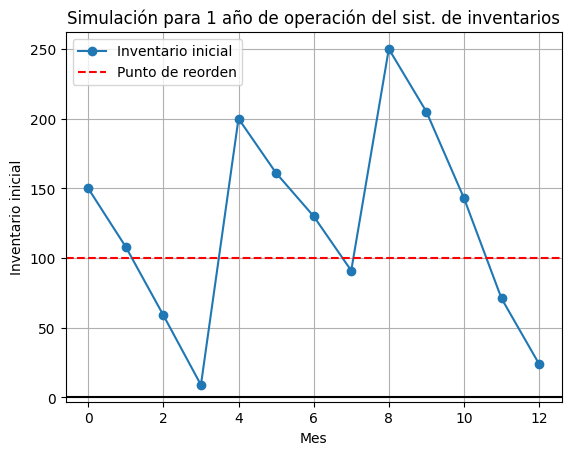

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         2194.38 │                1600 │       4094.38 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛
Valores óptimos: q = 205.0, R = 100
╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│  

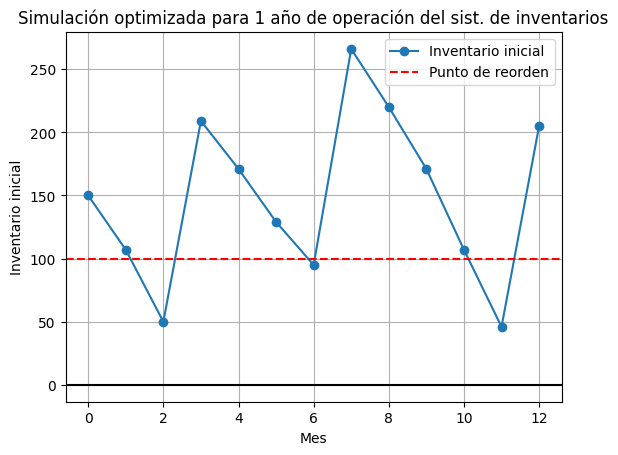

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                          2404.8 │                 200 │        2904.8 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


In [6]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def simulacion_inventario(q, R):
    def demanda():
        prob = [0, 0.01, 0.025, 0.045, 0.065, 0.087, 0.11, 0.135, 0.162, 0.19, 0.219, 0.254, 0.299, 0.359, 0.424, 0.494, 0.574, 0.649, 0.719, 0.784, 0.844, 0.894, 0.934, 0.964, 0.980, 0.995, 1]
        u = rnd.random()
        for i in range(len(prob)):
            if prob[i-1] <= u <= prob[i]:
                x = i + 34
                break
        return x, u

    def demanda_ajustada(x, mes):
        factor_mes = [1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
        for j in range(len(factor_mes)):
            if mes == j:
                x = round(x * factor_mes[j-1])
        return x

    def entrega(carga_pend, cont_ent):
        carga_pend = True
        v = rnd.random()
        if 0 <= v < 0.3:
            entrega = 1
        elif 0.3 <= v < 0.7:
            entrega = 2
        elif 0.7 <= v < 1:
            entrega = 3
        cont_ent += 1
        return entrega, carga_pend, cont_ent

    inv_inicial = 150
    inventario_i = [150]
    inv_falt = 0
    carga_pend = False
    t_entrega = 0
    cont = -1
    faltante = 0
    data = []
    cont_ent = 0

    for m in range(12):
        mes = m + 1
        dem, val = demanda()
        dem_ajus = demanda_ajustada(dem, mes)
        inv_final = inv_inicial - dem_ajus

        if inv_final < 0:
            faltante = abs(inv_final)
            inv_men_prom = inv_inicial / 2
            inv_falt += faltante
        else:
            inv_men_prom = (inv_inicial + inv_final) / 2

        if inv_final <= R and not carga_pend:
            t_entrega, carga_pend, cont_ent = entrega(carga_pend, cont_ent)

        if carga_pend:
            cont += 1

        if inv_final < 0:
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", "-", f"{faltante}", f"{t_entrega}", f"{np.round(inv_men_prom)}"])
        else:
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", f"{inv_final}", f"{faltante}", f"{t_entrega}", f"{np.round(inv_men_prom)}"])

        inv_inicial = max(inv_final, 0)

        if cont == t_entrega:
            cont = -1
            inv_inicial += q
            carga_pend = False
            t_entrega = 0

        faltante = 0
        inventario_i.append(inv_inicial)

    suma_inv_prom = sum(float(fila[-1]) for fila in data)
    costo_total = cont_ent * R + suma_inv_prom * 1.67 + inv_falt * 50
    return costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt

# Prueba inicial con valores de q y R
costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt = simulacion_inventario(200, 100)

# Imprime tabla sin optimizar
headers = ['Mes', 'Inventario inicial', 'No. aleatorio', 'Demanda', 'Demanda ajustada', 'Inventario final', 'Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica sin optimizar
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

costo = [cont_ent * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

def hooke_jeeves(func, x0, delta, epsilon, alpha=2):
    xp = x0[:]
    xb = x0[:]
    while delta > epsilon:
        xn = explore(func, xp, delta)
        if func(*xn) < func(*xb):
            xp = [2*xn[i] - xb[i] for i in range(len(x0))]
            xb = xn[:]
        else:
            delta /= alpha
            xp = xb[:]
    return xb

def explore(func, xp, delta):
    xn = xp[:]
    for i in range(len(xp)):
        P = func(*xn)
        xn[i] = xp[i] + delta
        N = func(*xn)
        if N > P:
            xn[i] = xp[i] - delta
            if func(*xn) > P:
                xn[i] = xp[i]
    return xn

def costo_total_wrapper(q, R):
    costo_total, _, _, _, _, _ = simulacion_inventario(q, R)
    return costo_total

# Valores iniciales de q y R
x0 = [200, 100]

# Parámetros del algoritmo
delta = 10
epsilon = 1

# Optimización
q_opt, R_opt = hooke_jeeves(costo_total_wrapper, x0, delta, epsilon)

# Simulación con valores óptimos
costo_total_opt, data_opt, inventario_i_opt, cont_ent_opt, suma_inv_prom_opt, inv_falt_opt = simulacion_inventario(q_opt, R_opt)

# Imprime tabla optimizada
print(f"Valores óptimos: q = {q_opt}, R = {R_opt}")
print(tabulate(data_opt, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica optimizada
plt.plot(inventario_i_opt, marker='o', label="Inventario inicial")
plt.title('Simulación optimizada para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(R_opt, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

# Tabla de costos optimizados
costo_opt = [cont_ent_opt * R_opt, suma_inv_prom_opt * 1.67, inv_falt_opt * 50, costo_total_opt]
print(tabulate([costo_opt], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))


╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │   Inventario final │   Faltante │ Entrega   │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │        0.494385 │        50 │                 60 │                 90 │          0 │ 1         │                         120   │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   90 │        0.451763 │        49 │                 49 │                 41 │          0 │ 1         │                          65.5 │
├───────┼───────────────────

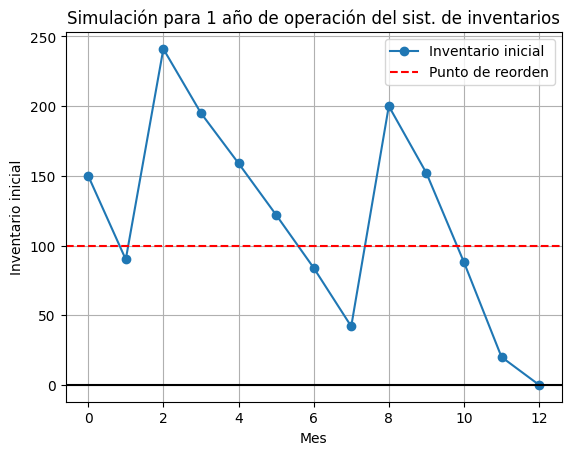

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         2117.56 │                   0 │       2417.56 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛
Valores óptimos: q = 180.0, R = 75.0
╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │   Inventario final │   Faltante │ Entrega   │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│ 

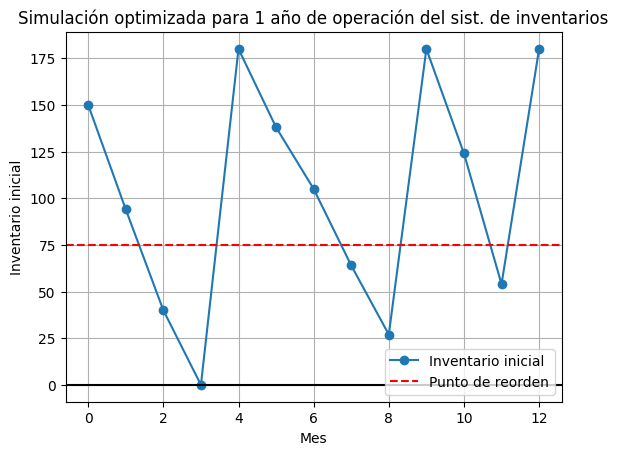

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                225 │                         1504.67 │                   0 │       1804.67 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


In [5]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def simulacion_inventario(q, R):
    def demanda():
        prob = [0, 0.01, 0.025, 0.045, 0.065, 0.087, 0.11, 0.135, 0.162, 0.19, 0.219, 0.254, 0.299, 0.359, 0.424, 0.494, 0.574, 0.649, 0.719, 0.784, 0.844, 0.894, 0.934, 0.964, 0.980, 0.995, 1]
        u = rnd.random()
        for i in range(1, len(prob)):
            if prob[i-1] <= u < prob[i]:
                x = i + 34
                break
        return x, u

    def demanda_ajustada(x, mes):
        factor_mes = [1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
        x = round(x * factor_mes[mes])
        return x

    def entrega(carga_pend, cont_ent):
        v = rnd.random()
        if 0 <= v < 0.3:
            entrega = 1
        elif 0.3 <= v < 0.7:
            entrega = 2
        elif 0.7 <= v < 1:
            entrega = 3
        cont_ent += 1
        carga_pend = True
        return entrega, carga_pend, cont_ent

    inv_inicial = 150
    inventario_i = [150]
    inv_falt = 0
    carga_pend = False
    t_entrega = 0
    cont = -1
    faltante = 0
    data = []
    cont_ent = 0

    for m in range(12):
        mes = m
        dem, val = demanda()
        dem_ajus = demanda_ajustada(dem, mes)
        inv_final = inv_inicial - dem_ajus

        if inv_final < 0:
            faltante = abs(inv_final)
            inv_final = 0

        inv_men_prom = (inv_inicial + inv_final) / 2

        if inv_final <= R and not carga_pend:
            t_entrega, carga_pend, cont_ent = entrega(carga_pend, cont_ent)

        if carga_pend:
            cont += 1

        data.append([f"{mes + 1}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", f"{inv_final}", f"{faltante}", f"{t_entrega if carga_pend else '-'}", f"{inv_men_prom}"])

        inv_inicial = inv_final

        if cont == t_entrega:
            cont = -1
            inv_inicial += q
            carga_pend = False
            t_entrega = 0

        faltante = 0
        inventario_i.append(inv_inicial)

    suma_inv_prom = sum(float(fila[8]) for fila in data)
    costo_total = cont_ent * 100 + suma_inv_prom * 1.67 + inv_falt * 50
    return costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt

# Prueba inicial con valores de q y R
costo_total, data, inventario_i, cont_ent, suma_inv_prom, inv_falt = simulacion_inventario(200, 100)

# Imprime tabla sin optimizar
headers = ['Mes', 'Inventario inicial', 'No. aleatorio', 'Demanda', 'Demanda ajustada', 'Inventario final', 'Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica sin optimizar
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

costo = [cont_ent * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

# Función de costo total para optimizar
def costo_total_wrapper(q, R):
    costo_total, _, _, _, _, _ = simulacion_inventario(q, R)
    return costo_total

# Algoritmo de Hooke-Jeeves
def hooke_jeeves(func, x0, delta, epsilon, alpha=2):
    xp = x0[:]
    xb = x0[:]
    while delta > epsilon:
        xn = explore(func, xp, delta)
        if func(*xn) < func(*xb):
            xp = [2*xn[i] - xb[i] for i in range(len(x0))]
            xb = xn[:]
        else:
            delta /= alpha
            xp = xb[:]
    return xb

def explore(func, xp, delta):
    xn = xp[:]
    for i in range(len(xp)):
        P = func(*xn)
        xn[i] = xp[i] + delta
        N = func(*xn)
        if N > P:
            xn[i] = xp[i] - delta
            if func(*xn) > P:
                xn[i] = xp[i]
    return xn

# Valores iniciales de q y R
x0 = [200, 100]

# Parámetros del algoritmo
delta = 10
epsilon = 1

# Optimización
q_opt, R_opt = hooke_jeeves(costo_total_wrapper, x0, delta, epsilon)

# Simulación con valores óptimos
costo_total_opt, data_opt, inventario_i_opt, cont_ent_opt, suma_inv_prom_opt, inv_falt_opt = simulacion_inventario(q_opt, R_opt)

# Imprime tabla optimizada
print(f"Valores óptimos: q = {q_opt}, R = {R_opt}")
print(tabulate(data_opt, headers=headers, tablefmt="fancy_grid", showindex=False))

# Imprime gráfica optimizada
plt.plot(inventario_i_opt, marker='o', label="Inventario inicial")
plt.title('Simulación optimizada para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(R_opt, color="red", linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

# Tabla de costos optimizados
costo_opt = [cont_ent_opt * R_opt, suma_inv_prom_opt * 1.67, inv_falt_opt * 50, costo_total_opt]
print(tabulate([costo_opt], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))
